In [1]:
#library
import os
import re
import glob
import math
import swifter
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv(r'C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\character_location_per_phase.csv')

In [3]:
def euclidean_distance(point1, point2):
    # point1과 point2는 각각 (x, y) 형태의 튜플 또는 리스트
    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance


def distance_character_whitecircle(row):

    character_location = (row['character.location.x'], row['character.location.y'])
    circle_location = (row['whitecircle_location_x'], row['whitecircle_location_y'])
    
    distance = euclidean_distance(character_location, circle_location)

    return distance


In [4]:
df1['distance'] = df1.swifter.apply(distance_character_whitecircle, axis=1, result_type='expand')

Pandas Apply:   0%|          | 0/33833 [00:00<?, ?it/s]

In [5]:
df1

,_D,character.name,character.location.x,character.location.y,character.location.z,character.isInBlueZone,phase,whitecircle_location_x,whitecircle_location_y,whitecircle_radius,distance
0,11:21:03.132,TL_Jiaoyang,605780.87500,366935.437500,10457.629883,False,1.0,438487.87500,245424.515625,203699.687500,206765.209801
1,11:21:03.133,TL_Jiaoyang,605888.00000,366900.062500,10551.200195,False,1.0,438487.87500,245424.515625,203699.687500,206831.115499
2,11:21:03.651,TL_Jiaoyang,605379.68750,367114.625000,9876.229492,False,1.0,438487.87500,245424.515625,203699.687500,206546.265518
3,11:21:05.326,TL_Jiaoyang,605124.12500,367265.593750,9903.726562,False,1.0,438487.87500,245424.515625,203699.687500,206428.893648
4,11:21:05.448,TL_Jiaoyang,605124.12500,367265.593750,9903.726562,False,1.0,438487.87500,245424.515625,203699.687500,206428.893648
...,...,...,...,...,...,...,...,...,...,...,...
33828,11:50:45.342,T5_Hatsawat,404608.06250,215308.390625,6225.689941,False,7.0,410221.46875,213685.875000,11076.323242,5843.191481
33829,11:50:49.007,T5_RossitedJR,411438.90625,217228.031250,4704.060059,False,7.0,410221.46875,213685.875000,11076.323242,3745.534003
33830,11:50:52.825,T5_Thanad0l,413216.18750,213688.890625,4371.159668,False,7.0,410221.46875,213685.875000,11076.323242,2994.720268
33831,11:50:53.337,T5_Hatsawat,404608.06250,215308.390625,6225.689941,False,7.0,410221.46875,213685.875000,11076.323242,5843.191481


In [6]:
# 특정 열의 데이터 처리
df1['character.name'] = df1['character.name'].apply(lambda x: x.split('_')[0])

# 결과 확인
print(df1)

                 _D character.name  character.location.x  \
0      11:21:03.132             TL          605780.87500   
1      11:21:03.133             TL          605888.00000   
2      11:21:03.651             TL          605379.68750   
3      11:21:05.326             TL          605124.12500   
4      11:21:05.448             TL          605124.12500   
...             ...            ...                   ...   
33828  11:50:45.342             T5          404608.06250   
33829  11:50:49.007             T5          411438.90625   
33830  11:50:52.825             T5          413216.18750   
33831  11:50:53.337             T5          404608.06250   
33832  11:50:56.996             T5          411438.90625   

       character.location.y  character.location.z  character.isInBlueZone  \
0             366935.437500          10457.629883                   False   
1             366900.062500          10551.200195                   False   
2             367114.625000           9876.22949

In [7]:
team_land_distance = df1.groupby('character.name')['distance'].sum()
team_land_distance

character.name
17      1.906726e+08
CES     2.116642e+08
DAY     2.182051e+08
DNW     4.873682e+08
FaZe    1.618065e+08
GEN     2.667385e+08
LG      1.425022e+08
NH      3.367872e+08
PeRo    9.489230e+07
SQ      8.561361e+07
SSG     2.203218e+07
T5      1.196296e+08
TL      2.817412e+08
TWIS    1.861238e+08
Tian    2.898647e+08
V7      1.651947e+08
Name: distance, dtype: float64

In [8]:
team_land_distance_DIC = team_land_distance.to_dict()
print(team_land_distance)

character.name
17      1.906726e+08
CES     2.116642e+08
DAY     2.182051e+08
DNW     4.873682e+08
FaZe    1.618065e+08
GEN     2.667385e+08
LG      1.425022e+08
NH      3.367872e+08
PeRo    9.489230e+07
SQ      8.561361e+07
SSG     2.203218e+07
T5      1.196296e+08
TL      2.817412e+08
TWIS    1.861238e+08
Tian    2.898647e+08
V7      1.651947e+08
Name: distance, dtype: float64


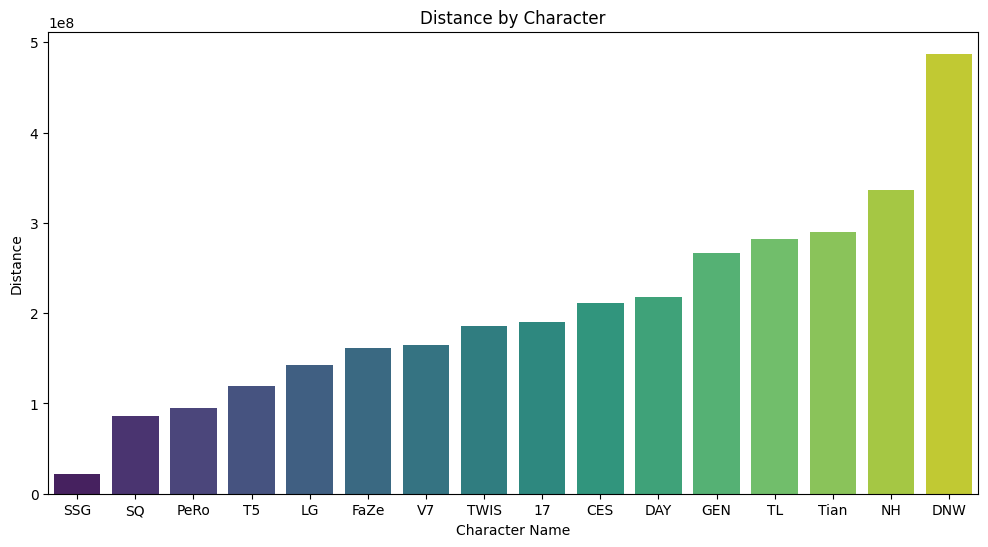

In [9]:
# 딕셔너리를 데이터프레임으로 변환
df_plot = pd.DataFrame(list(team_land_distance_DIC.items()), columns=['character.name', 'distance'])
df_plot = df_plot.sort_values(by='distance')

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x='character.name', y='distance', data=df_plot, palette='viridis')
plt.title('Distance by Character')
plt.xlabel('Character Name')
plt.ylabel('Distance')
plt.show()